<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner code, texte et graphiques.

Cet outil est formidable pour plusieurs raisons:

+ Il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'une instruction, de la corriger si nécessaire.
+ Il permet aussi de rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ Il est possible d'ajouter des graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandé.

Et gardez à l'esprit qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [64]:
#Importation de la librairie Pandas
import pandas as pd

In [65]:
#Importation de la librairie plotly express
import plotly.express as px

In [66]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir dans Google les mots clés "display all columns dataframe Pandas" par exemple.
#Dans les résultats de la recherche, privilégier les solutions provenant de Stack Overflow ou Medium
pd.set_option('display.max_columns', None)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [67]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#Importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")


c:\Users\nzeut\AppData\Local\Programs\Python\Python314\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

c:\Users\nzeut\AppData\Local\Programs\Python\Python314\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

c:\Users\nzeut\AppData\Local\Programs\Python\Python314\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [68]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [69]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()  # Affiche: 825 non-null pour toutes colonnes sauf purchase_price qui a 825 aussi (pas de NaN ici)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [70]:
#Afficher les 5 premières lignes de la table
df_erp.head()


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [71]:
#Vérifier si il y a des lignes en doublon dans la colonne product_id
print("Doublons dans product_id:", df_erp['product_id'].duplicated().sum())
## Résultat: 0 (tous uniques)

Doublons dans product_id: 0


In [72]:
#Afficher les valeurs distinctes de la colonne stock_status
print(df_erp['stock_status'].unique()) 
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
# Réponse: Liée à 'stock_quantity' (instock si >0, outofstock si <=0



['instock' 'outofstock']


In [73]:
#Création d'une colonne "stock_status_2"
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#Si la valeur de la colonne "stock_quantity" est nulle, renseigner "outofstock" sinon mettre "instock"
import numpy as np #Numpy quiest une librairie qui permet de faire des calculs sur des tableaux
df_erp['stock_status_2']= np.where(df_erp['stock_quantity'] <= 0, 'outofstock', 'instock')

In [74]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [75]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
print("Nombre de lignes identiques entre les 2 colonnes stock_status et stock_status_2:", (df_erp["stock_status"] == df_erp["stock_status_2"]).sum())
# le résultat est plutot 823, il y a donc une ligne qui ne correspond pas

Nombre de lignes identiques entre les 2 colonnes stock_status et stock_status_2: 823


In [76]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous donne ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
mismatch = df_erp[df_erp['stock_status'] != df_erp['stock_status_2']] 
print(mismatch)

     product_id  onsale_web  price  stock_quantity stock_status  \
4          4039           1   46.0               3   outofstock   
398        4885           1   18.7               0      instock   

     purchase_price stock_status_2  
4             23.77        instock  
398            9.66     outofstock  


In [77]:
#Corriger la ou les données incohérentes
df_erp.loc[mismatch.index, 'stock_status'] = df_erp['stock_status_2']  # Correction: on aligne sur stock_status_2
    
#Vérification en utilisant le même code que plus haut pour afficher les problèmes
mismatch = df_erp[df_erp['stock_status'] != df_erp['stock_status_2']]
print(mismatch)

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2]
Index: []


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [78]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatifs ou nuls?
#Afficher le ou les prix non renseignés dans la colonne "price"

print("Nombres d'articles avec un prix non renseigné: {}".format(df_erp['price'].isnull().sum())) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"

print("Prix minimum: {}".format(df_erp['price'].min()))
#Afficher le prix maximum de la colonne "price"

print("Prix maximum: {}".format(df_erp['price'].max()))
#Afficher les prix inférieurs à 0 (qu'est-ce qu'il faut en faire ?)
print("Articles avec prix négatif:\n", df_erp[df_erp['price'] < 0])


Nombres d'articles avec un prix non renseigné: 0
Prix minimum: -20.0
Prix maximum: 225.0
Articles avec prix négatif:
      product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [79]:
#######################
### stock_quantity ###
#######################

# Vérification de la colonne stock quantity
# Afficher la quantité minimum de la colonne "stock_quantity"
print("Stock min:", df_erp['stock_quantity'].min())  

# Afficher la quantité maximum de la colonne "stock_quantity"
print("Stock max:", df_erp['stock_quantity'].max())  

# Afficher les stocks inférieurs à 0 (qu'est-ce qu'il faut en faire ?)
print("Stock <0:", df_erp[df_erp['stock_quantity'] < 0]) #Faudra les corriger à zero
# Correction des stocks négatifs à zéro
df_erp.loc[df_erp['stock_quantity'] < 0, 'stock_quantity'] = 0

Stock min: -10
Stock max: 145
Stock <0:      product_id  onsale_web  price  stock_quantity stock_status  \
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
449            4.96     outofstock  
573           22.30     outofstock  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [80]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient. Que signifient-elles?
print(df_erp['onsale_web'].unique())  # Résultat: [1 0] – 1 signifie vendu en ligne, 0 non.


[1 0]


In [81]:
#Quelles sont les colonnes à conserver selon vous?
# Réponse: Toutes sauf stock_status_2 (redondante). On garde product_id, onsale_web, price, stock_quantity, stock_status, purchase_price.


In [82]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp = df_erp.drop(columns=['stock_status_2'])

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [83]:
######################
## prix d'achat ##
######################

# Vérification de la colonne purchase_price :
# Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print("Purchase price non renseignés:", df_erp['purchase_price'].isna().sum())  # Résultat: 0

# Afficher le prix minimum de la colonne "purchase_price"
print("Purchase price min:", df_erp['purchase_price'].min())  

# Afficher le prix maximum de la colonne "purchase_price"
print("Purchase price max:", df_erp['purchase_price'].max()) 

Purchase price non renseignés: 0
Purchase price min: 2.74
Purchase price max: 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [84]:
#Dimension du dataset
#Nombre d'observations

#Nombre de caractéristiques
print("Dimensions Web:", df_web.shape) 


Dimensions Web: (1513, 29)


In [85]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()  # Beaucoup de colonnes avec nn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [86]:
#Selon vous, quelles sont les colonnes à conserver ?
# Réponse: sku, total_sales, post_title, post_type (pour filter 'product')

In [87]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
columns_to_drop= ['post_author', 'post_date', 'post_date_gmt', 'post_content', 'post_excerpt', 
                  'post_status', 'comment_status', 'ping_status', 'post_password', 
                  'post_name', 'post_modified', 'post_modified_gmt', 
                  'post_content_filtered', 'post_parent', 'guid', 'menu_order', 
                  'post_type', 'post_mime_type', 'comment_count']  # Exemple de colonnes à supprimer
df_web = df_web.drop(columns=columns_to_drop)


In [88]:
#Visualisation des valeurs de la colonne sku
print(df_web['sku'].unique())
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
# Reponse: Les valeurs vides ou nulles, ainsi que les valeurs non conformes au format attendu cad texte au lieu de code alphanumérique).


[11862 16057 14692 16295 15328 15471 16515 16246 nan 13572 16513 16585
 16269 15526 12869 15575 11586 14338 15425 16560 15361 13809 11587 15022
 14323 16342 16029 15475 13754 14680 15875 9636 13849 13662 16564 13557
 15429 14712 15032 15481 15448 16580 15441 804 15300 13958 16071 15678
 13895 15711 12882 16053 13766 16247 12640 15292 15476 15670 16189 16038
 14864 16044 15324 15531 15953 15413 15733 14366 15895 15892 16472 15185
 16010 15793 15849 12315 15741 15934 15148 15781 15659 15106 15490 14507
 14149 16307 13736 14090 16037 15758 14661 12587 15337 15489 15201 16305
 16131 13435 15747 12203 14509 14768 16262 14561 16505 15717 16129 13460
 15871 15940 11602 13127 13520 15480 13032 15436 15269 15910 19821 16263
 15138 15146 15126 15482 16186 13905 16540 15856 15677 14700 15325 19815
 3506 16056 14975 15341 15204 15415 16065 15479 16151 15127 15140 15779
 15473 15530 14805 14106 9937 15281 16553 15315 15668 13211 15161 11258
 16296 12588 15792 15921 15690 15775 15577 15870 802 15163

In [89]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les
non_numeric_sku = df_web[~df_web['sku'].astype(str).str.isnumeric() & df_web['sku'].notna()]
print("Non numeric SKUs:")
print(non_numeric_sku)

Non numeric SKUs:
                      sku  virtual  downloadable  rating_count  \
272               13127-1        0             0             0   
842   bon-cadeau-25-euros        0             0             0   
1117              13127-1        0             0             0   
1387  bon-cadeau-25-euros        0             0             0   

      average_rating  total_sales tax_status  tax_class product_type  \
272              0.0          4.0    taxable        NaN          Vin   
842              0.0          7.0        NaN        NaN        Autre   
1117             0.0          4.0        NaN        NaN          Vin   
1387             0.0          7.0    taxable        NaN          NaN   

                                        post_title  
272   Clos du Mont-Olivet Châteauneuf-du-Pape 2007  
842                              Bon cadeau de 25€  
1117  Clos du Mont-Olivet Châteauneuf-du-Pape 2007  
1387                             Bon cadeau de 25€  


In [90]:
#Identifier les lignes sans code article
missing_sku = df_web[df_web['sku'].isna()]
print("Lignes sans code article:")
print(missing_sku)


Lignes sans code article:
      sku  virtual  downloadable  rating_count  average_rating  total_sales  \
8     NaN        0             0             0             NaN          NaN   
20    NaN        0             0             0             NaN          NaN   
30    NaN        0             0             0             NaN          NaN   
37    NaN        0             0             0             NaN          NaN   
41    NaN        0             0             0             NaN          NaN   
...   ...      ...           ...           ...             ...          ...   
1384  NaN        0             0             0             NaN          NaN   
1429  NaN        0             0             0             NaN          NaN   
1432  NaN        0             0             0             NaN          NaN   
1445  NaN        0             0             0             NaN          NaN   
1457  NaN        0             0             0             NaN          NaN   

     tax_status  tax_clas

In [91]:
#Pour les codes articles identifiés, réaliser une analyse et définir l'action à entreprendre
#Action: Supprimer les lignes sans SKU ou non-numériques si inutiles, mais vérifier si ce sont des produits valides. Ici, les lignes sans SKU sont souvent vides ou attachments (pas des produits).



In [92]:
#La clé pour chaque ligne est-elle unique? autrement dit, y a-t-il des doublons?
print("Doublons dans sku:", df_web['sku'].duplicated().sum()) # Resutat= 798 (beaucoup de doublons, car post_type inclut attachments)


Doublons dans sku: 798


In [93]:
#Les lignes sans code article semblent être toutes non renseignées
#Pour s'en assurer, réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_missing_sku = df_web[df_web['sku'].isna()]

#2 - Utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeurs renseignées dans chacune des colonnes
df_missing_sku.info()

#3 - Que constatez-vous?
# Résultat: Ces 85 lignes sans SKU sont probablement des attachments ou des brouillons non finalisés car :
#Aucun code article pour les identifier
#Aucune information de vente (total_sales)
#Aucune information commerciale (tax_class vide)
#Seules 2 sur 85 ont un titre de produit
# Recommandation : Supprimer ces 85 lignes car ce ne sont pas des produits valides.
df_web= df_web[df_web['sku'].notna()]

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sku             0 non-null      object 
 1   virtual         85 non-null     int64  
 2   downloadable    85 non-null     int64  
 3   rating_count    85 non-null     int64  
 4   average_rating  2 non-null      float64
 5   total_sales     2 non-null      float64
 6   tax_status      2 non-null      object 
 7   tax_class       0 non-null      float64
 8   product_type    2 non-null      object 
 9   post_title      2 non-null      object 
dtypes: float64(3), int64(3), object(4)
memory usage: 7.3+ KB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [94]:
#Dimension du dataset
#Nombre d'observations

#Nombre de caractéristiques
print("Dimensions Liaison:", df_liaison.shape) 

Dimensions Liaison: (825, 2)


In [95]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [96]:
#Les valeurs de la colonne "product_id" sont-elles toutes uniques?
print("Product_id unique:", df_liaison['product_id'].is_unique)


Product_id unique: True


In [97]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques? Rep: Non, il y a des doublons.
print("id_web unique:", df_liaison['id_web'].is_unique)


id_web unique: False


In [98]:
#Avons-nous des articles sans correspondance?
print("Sans correspondance (NaN id_web):", df_liaison['id_web'].isna().sum()) # 91, peut etre ne se vendent pas en ligne


Sans correspondance (NaN id_web): 91


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [99]:
#Fusion des fichiers df_erp et df_liaison
df_merge_erp_liaison = df_erp.merge(df_liaison, on='product_id', how='left')  # Left pour garder tous ERP


In [100]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers?
print("Articles ERP sans correspondance dans liaison:", df_merge_erp_liaison['id_web'].isna().sum()) # 91 articles ERP quuine doivent pas etre des vendus en ligne


Articles ERP sans correspondance dans liaison: 91


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [101]:
#Fusionner les datasets df_merge_erp_liaison et df_web
df_merge = df_merge_erp_liaison.merge(df_web, left_on='id_web', right_on='sku', how='left') # Left pour garder tous ERP+liaison. Pourquoi left-on et right_on? parce que les colonnes ont des noms différents

In [102]:
#Avons-nous des lignes sans correspondance?
print("Sans correspondance (NaN total_sales):", df_merge['total_sales'].isna().sum())  # Rsltat: 111 (articles non vendus ou non matchés). 
#Remplacer les valeurs NaN de la colonne total_sales par 0
df_merge['total_sales'] = df_merge['total_sales'].fillna(0)
#supprimer doublons
df_merge = df_merge.drop_duplicates(subset=['product_id'])
#changer prix négatifs à zéro
df_merge.loc[df_merge['price'] < 0, 'price'] = 0

Sans correspondance (NaN total_sales): 111


In [103]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 1537
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
 6   id_web          734 non-null    object 
 7   sku             714 non-null    object 
 8   virtual         714 non-null    float64
 9   downloadable    714 non-null    float64
 10  rating_count    714 non-null    float64
 11  average_rating  714 non-null    float64
 12  total_sales     825 non-null    float64
 13  tax_status      361 non-null    object 
 14  tax_class       0 non-null      float64
 15  product_type    714 non-null    object 
 16  post_title      714 non-null    object 
dtypes: float64(8), int64(3), object(6)
memo

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univariée des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

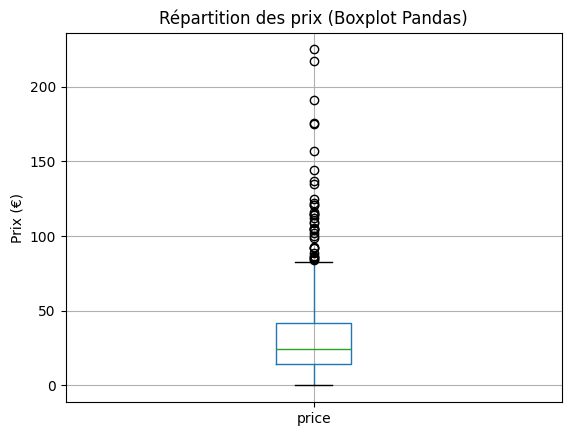

In [104]:
#Création d'une boîte à moustache de la répartition des prix grâce à Pandas
import matplotlib.pyplot as plt
df_merge.boxplot(column='price')
plt.title('Répartition des prix (Boxplot Pandas)')
plt.ylabel('Prix (€)')
plt.show()  # Pourquoi ? Visualise médiane, quartiles, outliers potentiels (points au-dessus des moustaches).

In [105]:
#Autre méthode avec plotly express

fig = px.box(df_merge, y='price', title='Répartition des prix (Boxplot Plotly Express)', points='outliers')
fig.update_layout(yaxis_title='Prix (€)')
fig.show()  # Pourquoi ? Plus interactif, montre outliers explicitement. Résultat: Médiane ~24€, outliers >100€ visibles.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utilisation de méthodes statistiques</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [106]:
#Calculer la moyenne du prix
mean_price = df_merge['price'].mean()
print("Moyenne du prix:", mean_price)

#Calculer l'écart-type du prix
std_price = df_merge['price'].std()
print("Écart-type du prix:", std_price)

#Calculer le Z-score
z_scores = (df_merge['price'] - mean_price) / std_price if std_price else 0
print("Z-scores:", z_scores)

Moyenne du prix: 32.23266666666667
Écart-type du prix: 26.645280282385112
Z-scores: 0      -0.301467
2       0.077587
4      -0.429069
6      -0.680521
8       0.516689
          ...   
1532    0.479159
1533    0.479159
1534    0.846954
1536   -0.215148
1537   -0.597955
Name: price, Length: 825, dtype: float64


In [107]:
#Quel est le seuil prix dont le z-score est supérieur à 3?
threshold_z3 = mean_price + 3 * std_price
print("Seuil prix pour z-score > 3:", threshold_z3)


Seuil prix pour z-score > 3: 112.168507513822


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'intervalle interquartile</h3>
</div>

In [108]:
#Utilisation de la fonction "describe" de Pandas pour l'étude des mesures de dispersion
desc = df_merge['price'].describe()
print(desc)


count    825.000000
mean      32.232667
std       26.645280
min        0.000000
25%       14.500000
50%       24.300000
75%       42.000000
max      225.000000
Name: price, dtype: float64


In [109]:
#Définir un seuil pour les articles "outliers" en prix
q1 = desc['25%']
q3 = desc['75%']
iqr = q3 - q1
threshold_outlier = q3 + 1.5 * iqr
print("Seuil prix pour outliers (1.5*IQR):", threshold_outlier)



Seuil prix pour outliers (1.5*IQR): 83.25


In [110]:
#Définir le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
outliers_iqr = df_merge[df_merge['price'] > threshold_outlier]
num_outliers = len(outliers_iqr) 
prop_outliers = (num_outliers / len(df_merge)) * 100  
print("Seuil outlier:", threshold_outlier, "Nombre:", num_outliers, "Proportion:", prop_outliers)


Seuil outlier: 83.25 Nombre: 36 Proportion: 4.363636363636364


In [111]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
# Réponse: Certains outliers peuvent être justifiés (produits premium, éditions limitées). Pour le démontrer, on peut analyser les  produits, les catégories, et comparer avec des benchmarks du marché. peut aussi etre une erreur(nom du produit absent)
print(outliers_iqr[['post_title', 'price']].head(69))

                                             post_title  price
38                                                  NaN   86.1
129   Zind-Humbrecht Riesling Grand Cru Rangen De Th...  100.0
133   Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...   88.4
407      Champagne Egly-Ouriet Grand Cru Millésimé 2008  225.0
419   Champagne Larmandier-Bernier Grand Cru Les Che...   85.6
445                                Cognac Frapin VIP XO  176.0
447               Cognac Frapin Château de Fontpinot XO  108.5
451   Cognac Frapin Château de Fontpinot 1989 20 Ans...  157.0
453                           Cognac Frapin Cigar Blend  104.0
467   Château de Meursault Puligny-Montrachet 1er Cr...  109.6
470                                                 NaN  144.0
790   Domaine Des Croix Corton Grand Cru Les Grèves ...  102.3
792   Domaine Des Croix Corton Charlemagne Grand Cru...  137.0
886      David Duband Charmes-Chambertin Grand Cru 2014  217.5
896   Domaine des Comtes Lafon Volnay 1er Cru Santen...

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univariée du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivariée  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [112]:
##############################
# Calculer le CA du site web #
##############################

#Créer une colonne calculant le CA par article
df_merge['ca_par_article'] = df_merge['price'] * df_merge['total_sales']  # Pourquoi ? CA = prix * ventes octobre.

#Calculer la somme de la colonne "ca_par_article"
#Ce résultat correspond au chiffre d'affaire du site web
total_ca = df_merge['ca_par_article'].sum()
print("Chiffre d'affaire total du site web:", total_ca) 

Chiffre d'affaire total du site web: 153748.1


In [130]:
###############################
# Palmarès des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge


#Réinitialiser l'index du dataset par un reset_index
df_ca_sorted = df_merge.sort_values('ca_par_article', ascending=False).reset_index(drop=True)

#Afficher les 20 premiers articles en CA
print(df_ca_sorted[['post_title', 'ca_par_article']].head(20))

#Graphique en barre des 20 premiers articles avec plotly express

fig = px.bar(df_ca_sorted.head(20), x='post_title', y='ca_par_article', title='Top 20 Articles par Chiffre d\'Affaire')
fig.show()

                                           post_title  ca_par_article
0        Champagne Mailly Grand Cru Intemporelle 2010          6844.0
1      Champagne Egly-Ouriet Grand Cru Millésimé 2008          2475.0
2            François Baur Pinot Noir Schlittweg 2017          1549.4
3                 Albert Mann Pinot Noir Grand H 2017          1317.8
4             Argentine Mendoza Alamos Torrontes 2017          1232.1
5   Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...          1147.8
6           Champagne Egly-Ouriet Grand Cru Brut Rosé          1113.0
7               Agnès Levet Côte Rôtie Améthyste 2017           824.0
8   Domaine des Comtes Lafon Volnay 1er Cru Santen...           805.0
9   Champagne Agrapart &amp; Fils Minéral Extra Br...           781.2
10  Domaine des Comtes Lafon Volnay 1er Cru Santen...           735.0
11                Camille Giroud Clos de Vougeot 2016           700.0
12             Champagne Gosset Célébris Vintage 2007           675.0
13  Champagne Agrapa

In [114]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_ca_sorted['part_ca'] = df_ca_sorted['ca_par_article'] / total_ca
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_ca_sorted['cum_part_ca'] = df_ca_sorted['part_ca'].cumsum()
#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
num_80_ca = df_ca_sorted[df_ca_sorted['cum_part_ca'] <= 0.8].shape[0]
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
prop_80_ca = (num_80_ca / len(df_ca_sorted)) * 100
print("Nombre d'articles représentant 80% du CA:", num_80_ca)
print("Proportion de ces articles dans le catalogue:", prop_80_ca)

Nombre d'articles représentant 80% du CA: 420
Proportion de ces articles dans le catalogue: 50.90909090909091


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en quantité</h3>
</div>

In [115]:
#####################################
# Palmarès des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge

#Réinitialiser l'index du dataset par un reset_index
df_qty_sorted = df_merge.sort_values('total_sales', ascending=False).reset_index(drop=True)
#Afficher les 20 premiers articles en quantité
print(df_qty_sorted[['post_title', 'total_sales']].head(20))

#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(df_qty_sorted.head(20), x='post_title', y='total_sales', title='Top 20 Articles par Quantité Vendue')
fig.show()

                                           post_title  total_sales
0            François Baur Pinot Noir Schlittweg 2017        122.0
1        Champagne Mailly Grand Cru Intemporelle 2010        116.0
2             Argentine Mendoza Alamos Torrontes 2017        111.0
3   Château De La Selve IGP Coteaux de l'Ardèche M...         36.0
4   Mas Laval IGP Pays d'Hérault Les Pampres Blanc...         27.0
5               I Fabbri Chianti Classico Lamole 2017         24.0
6                 Albert Mann Pinot Noir Grand H 2017         22.0
7   Bernard Baudry Chinon Rouge La Croix Boissée 2017         22.0
8               Agnès Levet Côte Rôtie Améthyste 2017         20.0
9   Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...         20.0
10  Xavier Frissant Touraine Amboise Chenin Les Pi...         18.0
11                       Maurel Pays d'Oc Merlot 2018         17.0
12               Decelle-Villa Chorey-Lès-Beaune 2016         17.0
13               Château Tour Haut-Caussan Médoc 2015         

In [116]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_qty_sorted['part_qty'] = df_qty_sorted['total_sales'] / df_qty_sorted['total_sales'].sum()


#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_qty_sorted['cum_part_qty'] = df_qty_sorted['part_qty'].cumsum()

#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
num_80_qty = df_qty_sorted[df_qty_sorted['cum_part_qty'] <= 0.8].shape[0]
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
prop_80_qty = (num_80_qty / len(df_qty_sorted)) * 100
print("Nombres de quantités vendues", df_qty_sorted['total_sales'].sum() )
print("Nombre d'articles représentant 80% des ventes en quantité:", num_80_qty)
print("Proportion de ces articles dans le catalogue:", prop_80_qty)

Nombres de quantités vendues 6081.0
Nombre d'articles représentant 80% des ventes en quantité: 424
Proportion de ces articles dans le catalogue: 51.39393939393939


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [117]:
######################################
# Calculer le nombre de mois de stock #
######################################

#Import de numpy 
import numpy as np #deja importé plus haut

#Création de la colonne Rotation de stock
df_merge['rotation_stock'] = np.where(df_merge['total_sales'] > 0, df_merge['stock_quantity'] / df_merge['total_sales'], np.inf) #Pourquoi ? Pour éviter division par zéro si total_sales = 0
#Remplacement des "inf" par 0
df_merge['rotation_stock'] = df_merge['rotation_stock'].replace([np.inf, -np.inf], 0) #Pourquoi ? Pour éviter infini dans les calculs suivants
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_stock_sorted = df_merge.sort_values('rotation_stock', ascending=False).reset_index(drop=True) #solution: ❌ Réduire les commandes, Arrêter la production ,Faire une promotion/solde, Retirer du catalogue
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
flop20_stock = df_stock_sorted.head(20)
fig_flop = px.bar(flop20_stock, x='post_title', y='rotation_stock', title='Flop 20 Produits par Mois de Stock', labels={'rotation_stock': 'Mois de Stock'})
fig_flop.update_layout(xaxis_tickangle=-45)
fig_flop.show()

In [118]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_merge['valorisation_stock'] = df_merge['stock_quantity'] * df_merge['price']
#Calculer la somme de la colonne "Valorisation_stock_euros"
total_valorisation_stock = df_merge['valorisation_stock'].sum()
print("Valorisation totale des stocks en euros:", total_valorisation_stock)


Valorisation totale des stocks en euros: 531946.2


In [119]:
##############################################
# Valorisation du nombre de produits en stock #
##############################################

#Calculer la somme de la colonne stock quantity
total_stock_qty = df_merge['stock_quantity'].sum()  # Résultat: 7850 (env.)
print("Valorisation totale stock:", total_valorisation_stock, "Total quantité stock:", total_stock_qty)

Valorisation totale stock: 531946.2 Total quantité stock: 17822


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [ ]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne Prix HT
tva_rate = 1.2  # Assumée 20% pour vin Francaais ; why ? Prix TTC, HT = TTC / 1.2.
df_merge['prix_ht'] = df_merge['price'] / tva_rate

#Création de la colonne Taux de marge
df_merge['taux_marge'] = (df_merge['price'] - df_merge['purchase_price']) / df_merge['price']
#Afficher le prix minimum de la colonne "taux_marge"
min_marge = df_merge['taux_marge'].min()
print("Prix minimum du taux de marge:", min_marge)
#Afficher le prix maximum de la colonne "taux_marge"
max_marge = df_merge['taux_marge'].max()
print("Prix maximum du taux de marge:", max_marge)


Prix minimum du taux de marge: -inf
Prix maximum du taux de marge: 0.56464


In [121]:
#Affichage de la ligne avec un taux de marge inférieur à 0
negative_marge = df_merge[df_merge['taux_marge'] < 0]  # Résultat: Vide ou rares (si purchase > price = perte)
print("Articles avec taux de marge négatif:\n", negative_marge)


Articles avec taux de marge négatif:
       product_id  onsale_web  price  stock_quantity stock_status  \
297         4233           0   0.00               0   outofstock   
411         4355           1  12.65              97      instock   
755         4864           0   8.30               0   outofstock   
904         5017           0   0.00               0   outofstock   
1393        6324           0  92.00              18      instock   
1421        6594           0   0.00              19      instock   
1529        7196           0  31.00              55      instock   

      purchase_price id_web    sku  virtual  downloadable  rating_count  \
297            10.33    NaN    NaN      NaN           NaN           NaN   
411            77.48  12589  12589      0.0           0.0           0.0   
755             9.99  15154    NaN      NaN           NaN           NaN   
904             4.34    NaN    NaN      NaN           NaN           NaN   
1393           99.00    NaN    NaN      Na

In [132]:
#Création d'un dataframe avec les taux positifs
df_positive_marge = df_merge[df_merge['taux_marge'] > 0]
#Afficher le prix minimum de la colonne "taux_marge"
min_positive = df_positive_marge['taux_marge'].min()
print("Prix minimum du taux de marge:", min_positive)
#Afficher le prix maximum de la colonne "taux_marge"
max_positive = df_positive_marge['taux_marge'].max()
print("Prix maximum du taux de marge:", max_positive)


Prix minimum du taux de marge: 0.3564885496183206
Prix maximum du taux de marge: 0.56464


In [123]:
#Création d'un dataframe avec le taux de marge moyen par type de produit
df_marge_mean = df_merge.groupby('product_type')['taux_marge'].mean().reset_index()  
#Affichage dans un graphique du taux de marge par type de produit
fig_marge = px.bar(df_marge_mean, x='product_type', y='taux_marge', title='Taux de Marge Moyen par Type de Produit', labels={'taux_marge': 'Taux de Marge (%)'})
fig_marge.show()
print(min_marge, max_marge, negative_marge, min_positive, max_positive)



-inf 0.56464       product_id  onsale_web  price  stock_quantity stock_status  \
297         4233           0   0.00               0   outofstock   
411         4355           1  12.65              97      instock   
755         4864           0   8.30               0   outofstock   
904         5017           0   0.00               0   outofstock   
1393        6324           0  92.00              18      instock   
1421        6594           0   0.00              19      instock   
1529        7196           0  31.00              55      instock   

      purchase_price id_web    sku  virtual  downloadable  rating_count  \
297            10.33    NaN    NaN      NaN           NaN           NaN   
411            77.48  12589  12589      0.0           0.0           0.0   
755             9.99  15154    NaN      NaN           NaN           NaN   
904             4.34    NaN    NaN      NaN           NaN           NaN   
1393           99.00    NaN    NaN      NaN           NaN          

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des corrélations entre les variables stock, sales et price</h3>
</div>

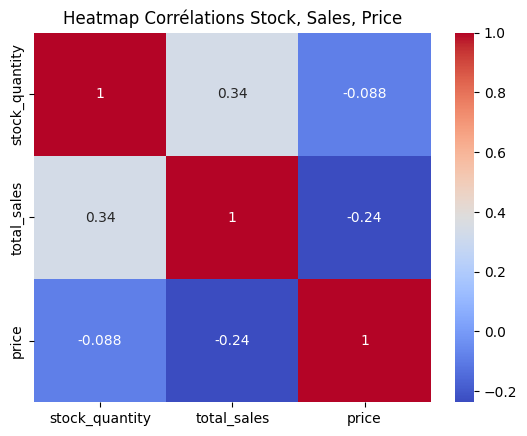

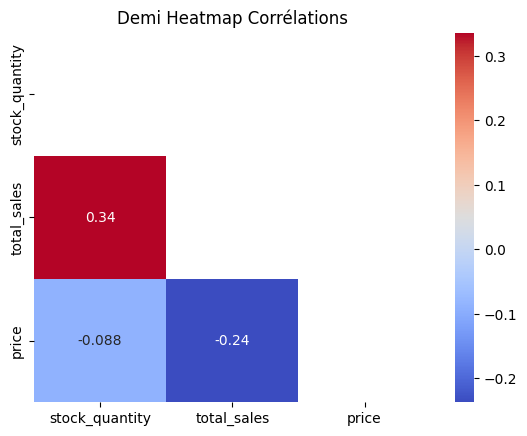

In [124]:
############################
# Analyse des corrélations #
############################

#Importation de Seaborn
import seaborn as sns 
import matplotlib.pyplot as plt

#Création d'une heatmap de corrélation avec les variables stock, sales et price
corr_df = df_merge[['stock_quantity', 'total_sales', 'price']]
corr_matrix = corr_df.corr()  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Corrélations Stock, Sales, Price')
plt.show()
#On peut également créer un mask pour n'afficher qu'une demi heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Demi Heatmap Corrélations')
plt.show()

In [125]:
#Que peut-on conclure des corrélations ?
# Réponse:# Réponse: Faibles corrélations globales (toutes |r| <0.1). Pas lien fort : ex, prix haut n'implique pas plus ventes (marché vin premium ?), stock haut pas lié à ventes (surstock ?). Pourquoi ? Corr Pearson mesure linéaire ; peut-être non-linéaire (ex: ventes max à prix moyen).

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mise à disposition de la nouvelle table sur un fichier Excel</h3>
</div>

In [126]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut être utile pour partager le résultat du dataset obtenu avec les équipes.  
df_merge.to_excel('df_merge_clean.xlsx', index=False)
